# Deep Learning Stuff You Should Know

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

Ok, So now we are going to be talking about the each and every function that was covered by the Lazy Programmer in his course [Modern Deep Learning](https://www.udemy.com/data-science-deep-learning-in-theano-tensorflow/learn/v4/overview). First off, some simple code to whet your appetite. These are pretty basic functions that do important tasks.

### Here we are going to create multiple clouds of datapoints surrounding multiple means

In [1]:
def get_clouds():
    Nclass = 500
    D = 2

    X1 = np.random.randn(Nclass, D) + np.array([0, -2])
    X2 = np.random.randn(Nclass, D) + np.array([2, 2])
    X3 = np.random.randn(Nclass, D) + np.array([-2, 2])

if a=[1,2,3] & b=[2,3,4]  
np.vstack((a,b)) = array([[1, 2, 3], [2, 3, 4]])  
  
if a = np.array([[1], [2], [3]]) b = np.array([[2], [3], [4]])  
np.vstack((a,b)) = array([[1],[2],[3],[2],[3],[4]])  
Note: how the [2] is **repeated**

In [ ]:
    X = np.vstack([X1, X2, X3]) 

    Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
    return X, Y

The code below is also quite easy to understand. It returns a spiral dataset. In case you don't know what linspace does, I gave an example below
```python
np.linspace(2.0, 3.0, num=5, endpoint=False) = array([ 2. ,  2.2,  2.4,  2.6,  2.8])
```

In [ ]:
def get_spiral():
    # Idea: radius -> low...high
    #           (don't start at 0, otherwise points will be "mushed" at origin)
    #       angle = low...high proportional to radius
    #               [0, 2pi/6, 4pi/6, ..., 10pi/6] --> [pi/2, pi/3 + pi/2, ..., ]
    # x = rcos(theta), y = rsin(theta) as usual

    radius = np.linspace(1, 10, 100)
    thetas = np.empty((6, 100))
    for i in range(6):
        start_angle = np.pi*i / 3.0
        end_angle = start_angle + np.pi / 2
        points = np.linspace(start_angle, end_angle, 100)
        thetas[i] = points

    # convert into cartesian coordinates
    x1 = np.empty((6, 100))
    x2 = np.empty((6, 100))
    for i in range(6):
        x1[i] = radius * np.cos(thetas[i])
        x2[i] = radius * np.sin(thetas[i])

    # inputs
    X = np.empty((600, 2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()

    # add noise
    X += np.random.randn(600, 2)*0.5

    # targets
    Y = np.array([0]*100 + [1]*100 + [0]*100 + [1]*100 + [0]*100 + [1]*100)
    return X, Y


## Code written using the function PCA from scikit learn

In [ ]:
def PCAexample():
    Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

    pca = PCA()
    reduced = pca.fit_transform(Xtrain)
    plt.scatter(reduced[:,0], reduced[:,1], s=100, c=Ytrain, alpha=0.5)
    plt.show()

    plt.plot(pca.explained_variance_ratio_.cumsum())
    plt.show()

    # cumulative variance
    # choose k = number of dimensions that gives us 95-99% variance
    cumulative = []
    last = 0
    for v in pca.explained_variance_ratio_:
        cumulative.append(last + v)
        last = cumulative[-1]
    plt.plot(cumulative)
    plt.show()


## Ok, but hoW abOuT ImPlemeNTinG PcA #Insert SpongeBob Meme
Basically, We calculate the eigen vectors and the eigen values and then sort the eigen vectors according to the the biggest eigen value

In [ ]:
def implePCA():
    # decompose covariance
    covX = np.cov(Xtrain.T)
    lambdas, Q = np.linalg.eigh(covX)


    # lambdas are sorted from smallest --> largest
    # some may be slightly negative due to precision
    idx = np.argsort(-lambdas)
    lambdas = lambdas[idx] # sort in proper order
    lambdas = np.maximum(lambdas, 0) # get rid of negatives
    Q = Q[:,idx]
    return Q

## get transformed data
### Uses PCA

This code is very helpful to do dataset processing. The if condition is written pretty well. My advice is to keep this code as part of your default codes.  
  
Ok, all you have to change in the code below is: 
1) the destination of the file
2) 

In [ ]:
def get_transformed_data():
    print("Reading in and transforming data...")

    if not os.path.exists('../large_files/train.csv'):
        print('Looking for ../large_files/train.csv')
        print('You have not downloaded the data and/or not placed the files in the correct location.')
        exit()

    df = pd.read_csv('../large_files/train.csv')
    print(df.head())
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    # Be careful, look at your dataset and see what processing you should do
    # Don't blindly copy the below

    X = data[:, 1:] #We are removing the first column that holds the indices
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    X = (X - mu) / std
    pca = PCA()
    Z = pca.fit_transform(X)
    

## In this partucular dataset, the labels are in the first column  
## don't simply do this

In [ ]:
    Y = data[:, 0].astype(np.int32)

    plot_cumulative_variance(pca)

    return Z, Y, pca, mu

## Normalized data
### This doesn't utilise PCA

In [ ]:
def get_normalized_data():
    print("Reading in and transforming data...")

    if not os.path.exists('../large_files/train.csv'):
        print('Looking for ../large_files/train.csv')
        print('You have not downloaded the data and/or not placed the files in the correct location.')
        print('Please get the data from: https://www.kaggle.com/c/digit-recognizer')
        print('Place train.csv in the folder large_files adjacent to the class folder')
        exit()

    df = pd.read_csv('../large_files/train.csv')
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    X = (X - mu) / std # normalize the data
    # be careful which column you are picking
    Y = data[:, 0]
    return X, Y

## t-SNE
The code is put after the model has been made. It is added after the whole preprocessing.

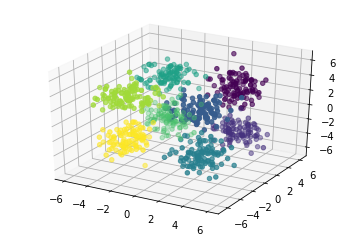

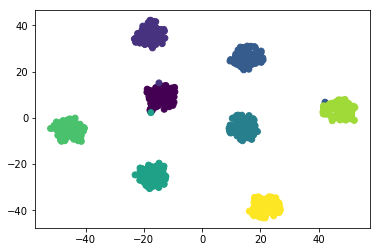

In [3]:
if __name__ == '__main__':
  # define the centers of each Gaussian cloud
  centers = np.array([
    [ 1,  1,  1],
    [ 1,  1, -1],
    [ 1, -1,  1],
    [ 1, -1, -1],
    [-1,  1,  1],
    [-1,  1, -1],
    [-1, -1,  1],
    [-1, -1, -1],
  ])*3

  # create the clouds, Gaussian samples centered at
  # each of the centers we just made
  data = []
  pts_per_cloud = 100
  for c in centers:
    cloud = np.random.randn(pts_per_cloud, 3) + c
    data.append(cloud)
  data = np.concatenate(data)

  # visualize the clouds in 3-D
  # add colors / labels so we can track where the points go
  colors = np.array([[i]*pts_per_cloud for i in range(len(centers))]).flatten()
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data[:,0], data[:,1], data[:,2], c=colors)
  plt.show()


  # perform dimensionality reduction
  tsne = TSNE()
  transformed = tsne.fit_transform(data)

  # visualize the clouds in 2-D
  plt.scatter(transformed[:,0], transformed[:,1], c=colors)
  plt.show()

## Useful Functions

The codes here are quite useful. The main functions are:  
1) plot_cumulative_variance(pca)  -> This will take in the pca and show you how the variation (information) is spread out among the dimensions.  
I prefer cumsum() as shown in the for loop.  
```python
pca.explained_variance_ratio_.cumsum() = [0.32047581, 0.59549787, 0.80178824, 0.932976, 1.]
```
2) y2indicator(y) -> This makes the y into a one hot encoding

In [ ]:
def plot_cumulative_variance(pca):
    P = []
    #for p in pca.explained_variance_ratio_:
    for p in pca.explained_variance_ratio_.cumsum():
        if len(P) == 0:
            P.append(p)
        else:
            P.append(p + P[-1])
    plt.plot(P)
    plt.show()
    return P


def forward(X, W, b):
    #This is just forward prop
    # softmax
    a = X.dot(W) + b
    expa = np.exp(a)
    y = expa / expa.sum(axis=1, keepdims=True)
    return y


def predict(p_y):
    return np.argmax(p_y, axis=1)


def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()


def gradW(t, y, X):
    return X.T.dot(t - y)


def gradb(t, y):
    return (t - y).sum(axis=0)

#this function makes it a one hot encoding
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

## Driver code for the above (won't run because csv file not present)

In [ ]:
def benchmark_full():
    X, Y = get_normalized_data()

    print("Performing logistic regression...")
    # lr = LogisticRegression(solver='lbfgs')

    # # test on the last 1000 points
    # lr.fit(X[:-1000, :200], Y[:-1000]) # use only first 200 dimensions
    # print lr.score(X[-1000:, :200], Y[-1000:])
    # print "X:", X

    # normalize X first
    # mu = X.mean(axis=0)
    # std = X.std(axis=0)
    # X = (X - mu) / std

    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]

    # convert Ytrain and Ytest to (N x K) matrices of indicator variables
    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    W = np.random.randn(D, 10) / np.sqrt(D)
    b = np.zeros(10)
    LL = []
    LLtest = []
    CRtest = []

    # reg = 1
    # learning rate 0.0001 is too high, 0.00005 is also too high
    # 0.00003 / 2000 iterations => 0.363 error, -7630 cost
    # 0.00004 / 1000 iterations => 0.295 error, -7902 cost
    # 0.00004 / 2000 iterations => 0.321 error, -7528 cost

    # reg = 0.1, still around 0.31 error
    # reg = 0.01, still around 0.31 error
    lr = 0.00004
    reg = 0.01
    for i in range(500):
        p_y = forward(Xtrain, W, b)
        # print "p_y:", p_y
        ll = cost(p_y, Ytrain_ind)
        LL.append(ll)

        p_y_test = forward(Xtest, W, b)
        lltest = cost(p_y_test, Ytest_ind)
        LLtest.append(lltest)

        err = error_rate(p_y_test, Ytest)
        CRtest.append(err)

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)
        if i % 10 == 0:
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)

    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    iters = range(len(LL))
    plt.plot(iters, LL, iters, LLtest)
    plt.show()
    plt.plot(CRtest)
    plt.show()


def benchmark_pca():
    X, Y, _, _ = get_transformed_data()
    X = X[:, :300]

    # normalize X first
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mu) / std

    print("Performing logistic regression...")
    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]

    N, D = Xtrain.shape
    Ytrain_ind = np.zeros((N, 10))
    for i in range(N):
        Ytrain_ind[i, Ytrain[i]] = 1

    Ntest = len(Ytest)
    Ytest_ind = np.zeros((Ntest, 10))
    for i in range(Ntest):
        Ytest_ind[i, Ytest[i]] = 1

    W = np.random.randn(D, 10) / np.sqrt(D)
    b = np.zeros(10)
    LL = []
    LLtest = []
    CRtest = []

    # D = 300 -> error = 0.07
    lr = 0.0001
    reg = 0.01
    for i in range(200):
        p_y = forward(Xtrain, W, b)
        # print "p_y:", p_y
        ll = cost(p_y, Ytrain_ind)
        LL.append(ll)

        p_y_test = forward(Xtest, W, b)
        lltest = cost(p_y_test, Ytest_ind)
        LLtest.append(lltest)

        err = error_rate(p_y_test, Ytest)
        CRtest.append(err)

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)
        if i % 10 == 0:
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)

    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    iters = range(len(LL))
    plt.plot(iters, LL, iters, LLtest)
    plt.show()
    plt.plot(CRtest)
    plt.show()


if __name__ == '__main__':
    benchmark_pca()
    # benchmark_full()

## Full, Stochastic, & Batch Gradient Descent

Ok, the first part of this code is just setup. **Note that the weights are proprtional to the dim (that is why /28)**  
The next parts are full, stochastic, and batch.  
The only difference is in the for loop and the init code right underneath it.  
  
**Full** is just super chill. Calculate the cost of the whole train set and repeat.  
**Stochastic** is where we pick at random (that is why we have the shuffle fucntion) and update for each sample, then repeat for all again. Here, we only run once because it is really slow.  
**Batch** is the combination of both.

In [1]:
def sgd():
    X, Y, _, _ = get_transformed_data()
    X = X[:, :300]

    # normalize X first
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mu) / std

    print("Performing logistic regression...")
    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]

    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    ####################################################################
    ####################################################################
    ####################################################################
    ####################################################################
    # 1. full gradient descent
    #28 because we want the weight to be inversely
    #proportional to the dimension
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL = []
    lr = 0.0001
    reg = 0.01
    t0 = datetime.now()
    for i in range(200):
        p_y = forward(Xtrain, W, b)

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)

        # we are just calculating the test set cost
        # then we will just plot it
        p_y_test = forward(Xtest, W, b)
        ll = cost(p_y_test, Ytest_ind)
        LL.append(ll)


        if i % 10 == 0:
            err = error_rate(p_y_test, Ytest)
            print("Cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for full GD:", datetime.now() - t0)

    ####################################################################
    ####################################################################
    ####################################################################
    ####################################################################
    # 2. stochastic gradient descent
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL_stochastic = []
    lr = 0.0001
    reg = 0.01

    t0 = datetime.now()
    for i in range(1): # takes very long since we're computing cost for 41k samples
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for n in range(min(N, 500)): # shortcut so it won't take so long...
            x = tmpX[n,:].reshape(1,D)
            y = tmpY[n,:].reshape(1,10)
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_stochastic.append(ll)

            if n % (N//2) == 0:
                err = error_rate(p_y_test, Ytest)
                print("Cost at iteration %d: %.6f" % (i, ll))
                print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for SGD:", datetime.now() - t0)

    ####################################################################
    ####################################################################
    ####################################################################
    ####################################################################
    # 3. batch gradient descent
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    LL_batch = []
    lr = 0.0001
    reg = 0.01
    batch_sz = 500
    n_batches = N // batch_sz

    t0 = datetime.now()
    for i in range(50):
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)
        for j in range(n_batches):
            # The equation below is just to select the batch
            x = tmpX[j*batch_sz:(j*batch_sz + batch_sz),:]
            y = tmpY[j*batch_sz:(j*batch_sz + batch_sz),:]
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            ll = cost(p_y_test, Ytest_ind)
            LL_batch.append(ll)
            if j % (n_batches//2) == 0:
                err = error_rate(p_y_test, Ytest)
                print("Cost at iteration %d: %.6f" % (i, ll))
                print("Error rate:", err)
    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for batch GD:", datetime.now() - t0)



    x1 = np.linspace(0, 1, len(LL))
    plt.plot(x1, LL, label="full")
    x2 = np.linspace(0, 1, len(LL_stochastic))
    plt.plot(x2, LL_stochastic, label="stochastic")
    x3 = np.linspace(0, 1, len(LL_batch))
    plt.plot(x3, LL_batch, label="batch")
    plt.legend()
    plt.show()

## Momentum

There are 2 types of ways to go about this. Normal and Nesterov! The normal way just has  
$\theta_{t}$ = $\theta_{t-1}$ + $\nu_{t}$  
$\nu_{t}$ = $\mu$ $\nu_{t-1}$ - $\eta$ $\nabla$ J($\theta_{t-1}$)  
  
### While Nesterov is
$\nu_{t}$ = $\nu_{t-1}$ - $\eta$ $\nabla$ J($\theta_{t-1}$ + $\nu_{t-1}$)  
Basically, we calculate the gradient of where we are going to go instead of where we are at now.  
#### Why?
Well, the velocity at time t is going to be the gradient at **that** place + velocity at t-1  
### HACK
After some simplyfying, we get update equations as  
$\nu_{t}$ = $\mu$ $\nu_{t-1}$ - $\eta$ $\nabla$ J($\theta_{t-1}'$)  
$\theta_{t}'$ = $\theta_{t-1}'$ + $\mu$ $\nu_{t}$ - $\eta$ $\nabla$ J($\theta_{t-1}'$)  
$\theta_{t}'$ = $\theta_{t}$ + $\nu_{t}$  
### Forget about $\theta_{t}$ now, and just use $\theta_{t}'$ in its place, along with the new update rule

In [2]:
 def momentum():

    max_iter = 20 # make it 30 for sigmoid
    print_period = 10

    X, Y = get_normalized_data()
    lr = 0.00004
    reg = 0.01

    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz

    M = 300
    K = 10
    W1 = np.random.randn(D, M) / np.sqrt(D)
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)

    # save initial weights
    W1_0 = W1.copy()
    b1_0 = b1.copy()
    W2_0 = W2.copy()
    b2_0 = b2.copy()

    # 1. batch
    losses_batch = []
    errors_batch = []
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            # print "first batch cost:", cost(pYbatch, Ybatch)

            # updates
            W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
            b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
            W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
            b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                losses_batch.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                e = error_rate(pY, Ytest)
                errors_batch.append(e)
                print("Error rate:", e)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))

    # 2. batch with momentum
    W1 = W1_0.copy()
    b1 = b1_0.copy()
    W2 = W2_0.copy()
    b2 = b2_0.copy()
    losses_momentum = []
    errors_momentum = []
    mu = 0.9
    dW2 = 0
    db2 = 0
    dW1 = 0
    db1 = 0
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

            # update velocities
            dW2 = mu*dW2 - lr*gW2
            db2 = mu*db2 - lr*gb2
            dW1 = mu*dW1 - lr*gW1
            db1 = mu*db1 - lr*gb1

            # updates
            W2 += dW2
            b2 += db2
            W1 += dW1
            b1 += db1

            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                losses_momentum.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                e = error_rate(pY, Ytest)
                errors_momentum.append(e)
                print("Error rate:", e)
    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))


    # 3. batch with Nesterov momentum
    W1 = W1_0.copy()
    b1 = b1_0.copy()
    W2 = W2_0.copy()
    b2 = b2_0.copy()

    losses_nesterov = []
    errors_nesterov = []

    mu = 0.9
    vW2 = 0
    vb2 = 0
    vW1 = 0
    vb1 = 0
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # updates
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

            # v update
            vW2 = mu*vW2 - lr*gW2
            vb2 = mu*vb2 - lr*gb2
            vW1 = mu*vW1 - lr*gW1
            vb1 = mu*vb1 - lr*gb1

            # param update
            W2 += mu*vW2 - lr*gW2
            b2 += mu*vb2 - lr*gb2
            W1 += mu*vW1 - lr*gW1
            b1 += mu*vb1 - lr*gb1

            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                losses_nesterov.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                e = error_rate(pY, Ytest)
                errors_nesterov.append(e)
                print("Error rate:", e)
    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))



    plt.plot(losses_batch, label="batch")
    plt.plot(losses_momentum, label="momentum")
    plt.plot(losses_nesterov, label="nesterov")
    plt.legend()
    plt.show()


## Adagrad
$\theta_{t}'$ = $\theta_{t-1}'$ - $\eta$ $\frac{\nabla J(\theta_{t-1}')}{\sqrt{cahce+\epsilon}}$  
cache = cache + $gradient^{2}$
## RMS Prop
cache = decay\*cache + (1-decay)*$gradient^{2}$  
decay=0.9,0.99  
  
The code below has these equations in the update equations.  

In [3]:
def main():
    max_iter = 20 # make it 30 for sigmoid
    print_period = 10

    X, Y = get_normalized_data()
    lr = 0.00004
    reg = 0.01

    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz

    M = 300
    K = 10
    W1 = np.random.randn(D, M) / 28
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)

    # 1. const
    # cost = -16
    LL_batch = []
    CR_batch = []
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            # print "first batch cost:", cost(pYbatch, Ybatch)

            # updates
            W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
            b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
            W1 -= lr*(derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
            b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

            if j % print_period == 0:
                # calculate just for LL
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                # print "pY:", pY
                ll = cost(pY, Ytest_ind)
                LL_batch.append(ll)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

                err = error_rate(pY, Ytest)
                CR_batch.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))


    # 2. RMSprop
    W1 = np.random.randn(D, M) / 28
    b1 = np.zeros(M)
    W2 = np.random.randn(M, K) / np.sqrt(M)
    b2 = np.zeros(K)
    LL_rms = []
    CR_rms = []
    lr0 = 0.001 # if you set this too high you'll get NaN!
    cache_W2 = 1
    cache_b2 = 1
    cache_W1 = 1
    cache_b1 = 1
    decay_rate = 0.999
    eps = 1e-10
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
            # print "first batch cost:", cost(pYbatch, Ybatch)

            # updates
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
            W2 -= lr0 * gW2 / (np.sqrt(cache_W2) + eps)

            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
            b2 -= lr0 * gb2 / (np.sqrt(cache_b2) + eps)

            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
            W1 -= lr0 * gW1 / (np.sqrt(cache_W1) + eps)

            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
            b1 -= lr0 * gb1 / (np.sqrt(cache_b1) + eps)

            if j % print_period == 0:
                # calculate just for LL
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                # print "pY:", pY
                ll = cost(pY, Ytest_ind)
                LL_rms.append(ll)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, ll))

                err = error_rate(pY, Ytest)
                CR_rms.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))

    plt.plot(LL_batch, label='const')
    plt.plot(LL_rms, label='rms')
    plt.legend()
    plt.show()

## Adam
Here, the cache and $\nabla J(\theta_{t}')$ are estimated as$\frac{cache}{1-\beta_{2}^{t}}$ and $\frac{\nabla J(\theta_{t}')}{1-\beta_{1}^{t}}$  
### This is just used to make sure the initial conditions are not messed up, as in at t=0

In [4]:
def main():
    max_iter = 10
    print_period = 10

    X, Y = get_normalized_data()
    reg = 0.01

    Xtrain = X[:-1000,]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:,]
    Ytest  = Y[-1000:]
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    N, D = Xtrain.shape
    batch_sz = 500
    n_batches = N // batch_sz

    M = 300
    K = 10
    W1_0 = np.random.randn(D, M) / np.sqrt(D)
    b1_0 = np.zeros(M)
    W2_0 = np.random.randn(M, K) / np.sqrt(M)
    b2_0 = np.zeros(K)

    W1 = W1_0.copy()
    b1 = b1_0.copy()
    W2 = W2_0.copy()
    b2 = b2_0.copy()

    # 1st moment
    mW1 = 0
    mb1 = 0
    mW2 = 0
    mb2 = 0

    # 2nd moment
    vW1 = 0
    vb1 = 0
    vW2 = 0
    vb2 = 0

    # hyperparams
    lr0 = 0.001
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    # 1. Adam
    loss_adam = []
    err_adam = []
    t = 1
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # updates
            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

            # new m
            mW1 = beta1 * mW1 + (1 - beta1) * gW1
            mb1 = beta1 * mb1 + (1 - beta1) * gb1
            mW2 = beta1 * mW2 + (1 - beta1) * gW2
            mb2 = beta1 * mb2 + (1 - beta1) * gb2

            # new v
            vW1 = beta2 * vW1 + (1 - beta2) * gW1 * gW1
            vb1 = beta2 * vb1 + (1 - beta2) * gb1 * gb1
            vW2 = beta2 * vW2 + (1 - beta2) * gW2 * gW2
            vb2 = beta2 * vb2 + (1 - beta2) * gb2 * gb2

            # bias correction
            correction1 = 1 - beta1 ** t
            hat_mW1 = mW1 / correction1
            hat_mb1 = mb1 / correction1
            hat_mW2 = mW2 / correction1
            hat_mb2 = mb2 / correction1

            correction2 = 1 - beta2 ** t
            hat_vW1 = vW1 / correction2
            hat_vb1 = vb1 / correction2
            hat_vW2 = vW2 / correction2
            hat_vb2 = vb2 / correction2

            # update t
            t += 1

            # apply updates to the params
            W1 = W1 - lr0 * hat_mW1 / np.sqrt(hat_vW1 + eps)
            b1 = b1 - lr0 * hat_mb1 / np.sqrt(hat_vb1 + eps)
            W2 = W2 - lr0 * hat_mW2 / np.sqrt(hat_vW2 + eps)
            b2 = b2 - lr0 * hat_mb2 / np.sqrt(hat_vb2 + eps)


            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                loss_adam.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                err = error_rate(pY, Ytest)
                err_adam.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))


    # 2. RMSprop with momentum
    W1 = W1_0.copy()
    b1 = b1_0.copy()
    W2 = W2_0.copy()
    b2 = b2_0.copy()
    loss_rms = []
    err_rms = []

    # comparable hyperparameters for fair comparison
    lr0 = 0.001
    mu = 0.9
    decay_rate = 0.999
    eps = 1e-8

    # rmsprop cache
    cache_W2 = 1
    cache_b2 = 1
    cache_W1 = 1
    cache_b1 = 1

    # momentum
    dW1 = 0
    db1 = 0
    dW2 = 0
    db2 = 0
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # updates
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
            dW2 = mu * dW2 + (1 - mu) * lr0 * gW2 / (np.sqrt(cache_W2) + eps)
            W2 -= dW2

            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
            db2 = mu * db2 + (1 - mu) * lr0 * gb2 / (np.sqrt(cache_b2) + eps)
            b2 -= db2

            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
            dW1 = mu * dW1 + (1 - mu) * lr0 * gW1 / (np.sqrt(cache_W1) + eps)
            W1 -= dW1

            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
            db1 = mu * db1 + (1 - mu) * lr0 * gb1 / (np.sqrt(cache_b1) + eps)
            b1 -= db1

            if j % print_period == 0:
                pY, _ = forward(Xtest, W1, b1, W2, b2)
                l = cost(pY, Ytest_ind)
                loss_rms.append(l)
                print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

                err = error_rate(pY, Ytest)
                err_rms.append(err)
                print("Error rate:", err)

    pY, _ = forward(Xtest, W1, b1, W2, b2)
    print("Final error rate:", error_rate(pY, Ytest))

    plt.plot(loss_adam, label='adam')
    plt.plot(loss_rms, label='rmsprop')
    plt.legend()
    plt.show()

## Grid Search
Ok, this is really easy. We are just checking different architectures, learning rates, l2 param  
It is just a bunch of for loops

In [6]:
def grid_search():
  # get the data and split into train/test
  X, Y = get_spiral()
  # X, Y = get_clouds()
  X, Y = shuffle(X, Y)
  Ntrain = int(0.7*len(X))
  Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
  Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

  # hyperparameters to try
  hidden_layer_sizes = [
    [300],
    [100,100],
    [50,50,50],
  ]
  learning_rates = [1e-4, 1e-3, 1e-2]
  l2_penalties = [0., 0.1, 1.0]

  # loop through all possible hyperparameter settings
  best_validation_rate = 0
  best_hls = None
  best_lr = None
  best_l2 = None
  for hls in hidden_layer_sizes:
    for lr in learning_rates:
      for l2 in l2_penalties:
        model = ANN(hls)
        model.fit(Xtrain, Ytrain, learning_rate=lr, reg=l2, mu=0.99, epochs=3000, show_fig=False)
        validation_accuracy = model.score(Xtest, Ytest)
        train_accuracy = model.score(Xtrain, Ytrain)
        print(
          "validation_accuracy: %.3f, train_accuracy: %.3f, settings: %s, %s, %s" %
            (validation_accuracy, train_accuracy, hls, lr, l2)
        )
        if validation_accuracy > best_validation_rate:
          best_validation_rate = validation_accuracy
          best_hls = hls
          best_lr = lr
          best_l2 = l2
  print("Best validation_accuracy:", best_validation_rate)
  print("Best settings:")
  print("hidden_layer_sizes:", best_hls)
  print("learning_rate:", best_lr)
  print("l2:", best_l2)

## Random Search
Ok, this is really easy. We are just sampling different architectures, learning rates, l2 param  
It is just a bunch of for loops

In [7]:
def random_search():
  # get the data and split into train/test
  X, Y = get_spiral()
  # X, Y = get_clouds()
  X, Y = shuffle(X, Y)
  Ntrain = int(0.7*len(X))
  Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
  Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

  # starting hyperparameters
  M = 20
  nHidden = 2
  log_lr = -4
  log_l2 = -2 # since we always want it to be positive
  max_tries = 30
  

  # loop through all possible hyperparameter settings
  best_validation_rate = 0
  best_hls = None
  best_lr = None
  best_l2 = None
  for _ in range(max_tries):
    model = ANN([M]*nHidden)
    model.fit(
      Xtrain, Ytrain,
      learning_rate=10**log_lr, reg=10**log_l2,
      mu=0.99, epochs=3000, show_fig=False
    )
    validation_accuracy = model.score(Xtest, Ytest)
    train_accuracy = model.score(Xtrain, Ytrain)
    print(
      "validation_accuracy: %.3f, train_accuracy: %.3f, settings: %s, %s, %s" %
        (validation_accuracy, train_accuracy, [M]*nHidden, log_lr, log_l2)
    )
    if validation_accuracy > best_validation_rate:
      best_validation_rate = validation_accuracy
      best_M = M
      best_nHidden = nHidden
      best_lr = log_lr
      best_l2 = log_l2

    # select new hyperparams
    nHidden = best_nHidden + np.random.randint(-1, 2) # -1, 0, or 1
    nHidden = max(1, nHidden)
    M = best_M + np.random.randint(-1, 2)*10
    M = max(10, M)
    log_lr = best_lr + np.random.randint(-1, 2)
    log_l2 = best_l2 + np.random.randint(-1, 2)
  print("Best validation_accuracy:", best_validation_rate)
  print("Best settings:")
  print("best_M:", best_M)
  print("best_nHidden:", best_nHidden)
  print("learning_rate:", best_lr)
  print("l2:", best_l2)


## Weight Initialization
#### If you have M1 input nodes and M2 output nodes
```python
W=np.random.randn(M1,M2)*0.01
```
### OR (if you have relu)
```python
var=2/M1
W=np.random.randn(M1,M2)*np.sqrt(var)
```


This is text
# Heading